<AxesSubplot:>

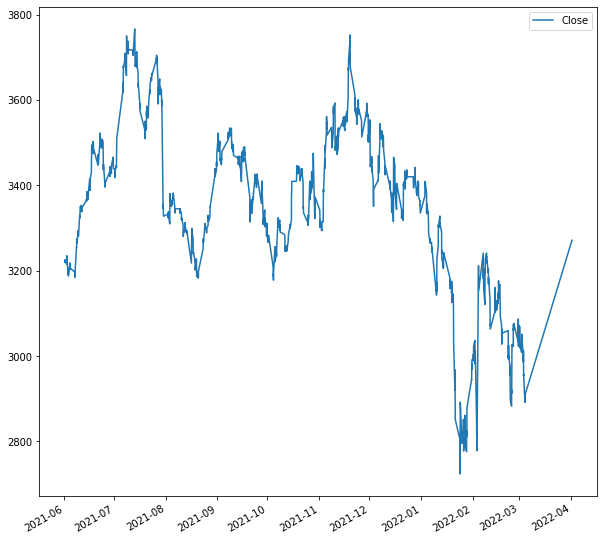

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


data=yf.download('AMZN',start='2021-06-01', interval='1h',  end='2022-03-07',progress=False)[['Close']]
data.head()

data.plot(figsize=(10,10))

In [3]:
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)


lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

1204 10
134 10
1204
134


In [4]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

#Reshape data for (Sample,Timestep,Features)
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

model.summary()

Epoch 1/300
38/38 [==============================] - 4s 49ms/step - loss: 0.0268 - val_loss: 0.0252
Epoch 2/300
38/38 [==============================] - 1s 24ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 3/300
38/38 [==============================] - 1s 21ms/step - loss: 0.0097 - val_loss: 0.0066
Epoch 4/300
38/38 [==============================] - 1s 20ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 5/300
38/38 [==============================] - 1s 21ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 6/300
38/38 [==============================] - 1s 21ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 7/300
38/38 [==============================] - 1s 20ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 8/300
38/38 [==============================] - 1s 20ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 9/300
38/38 [==============================] - 1s 22ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 10/300
38/38 [==============================] - 1s 22ms/step - loss: 0.0041 - val_loss: 0.0031

Text(0.5, 1.0, 'Train Dataset')

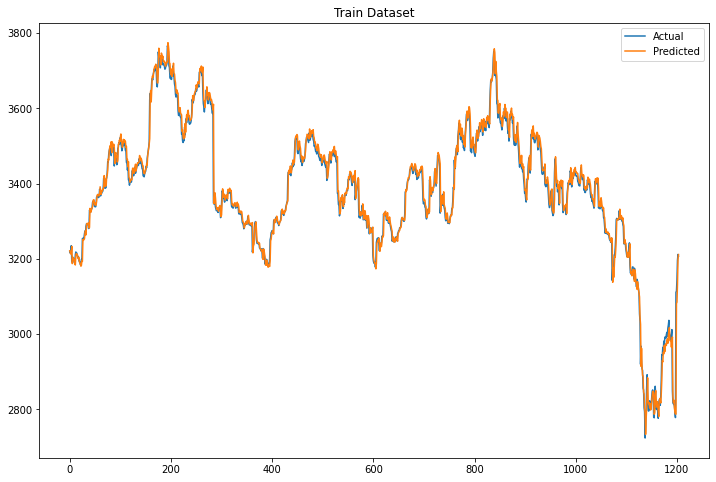

In [5]:
plt.figure(figsize=(12,8))

Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

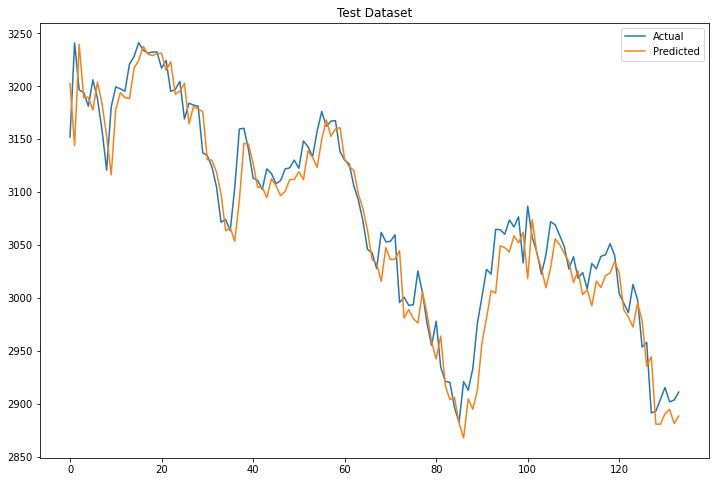

In [6]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

Epoch 1/300
85/85 [==============================] - 4s 21ms/step - loss: 0.0274 - val_loss: 0.0062
Epoch 2/300
85/85 [==============================] - 1s 13ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 3/300
85/85 [==============================] - 1s 12ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 4/300
85/85 [==============================] - 1s 12ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 5/300
85/85 [==============================] - 1s 11ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 6/300
85/85 [==============================] - 1s 12ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 7/300
85/85 [==============================] - 1s 11ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 8/300
85/85 [==============================] - 1s 11ms/step - loss: 0.0013 - val_loss: 7.0422e-04
Epoch 9/300
85/85 [==============================] - 1s 11ms/step - loss: 0.0019 - val_loss: 6.0801e-04
Epoch 10/300
85/85 [==============================] - 1s 11ms/step - loss: 0.0052 - val_loss

Text(0.5, 1.0, 'Train Dataset')

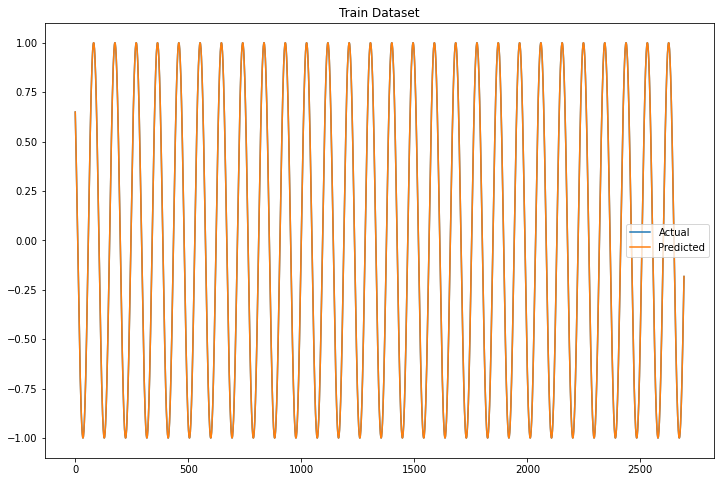

In [8]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, BatchNormalization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler



cl = np.linspace(-100, 100, 3000)
cl = np.cos(cl)
train = cl[0:int(len(cl)*0.90)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.reshape(-1,1))
cl =scl.transform(cl.reshape(-1,1))
#Create a function to process the data into lb day look back slices
# and create the train test dataset (80-20)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)


lb=5
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]

#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


#Reshape data for (Sample,Timestep,Features)
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)


plt.figure(figsize=(12,8))

Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

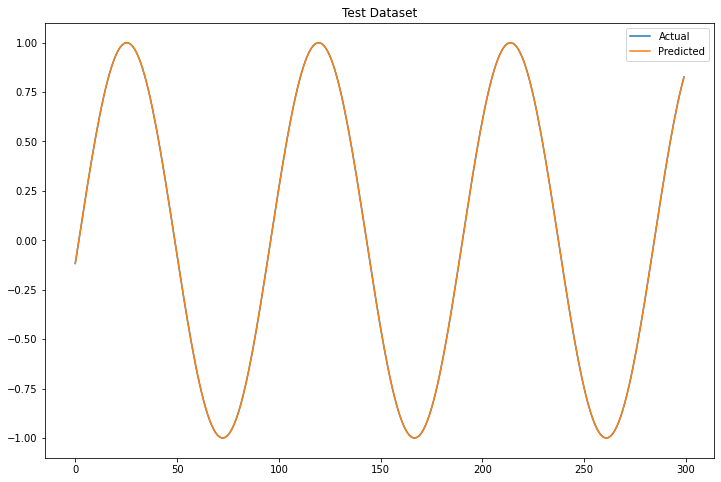

In [11]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

Text(0.5, 1.0, 'Test Dataset 300 Obs Ahead')

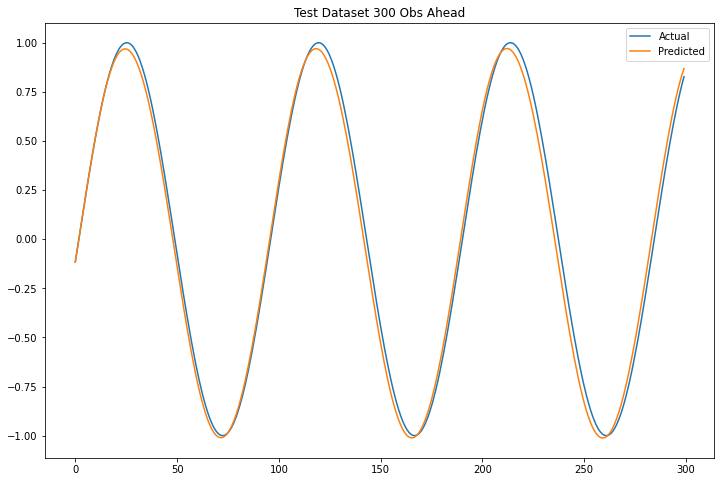

In [12]:
def processData(data,lb):
    X= []
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
    return np.array(X)

# create the x_test_dummy
cl2 =cl.copy()
pred = []
for i in range(X_test.shape[0]):
    cl2[int(X.shape[0]*0.90)+i+lb] = model.predict(X_test)[i]
    pred.extend(model.predict(X_test)[i])
    X = processData(cl2,lb)
    X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))


Xt = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset 300 Obs Ahead")